In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
customer_df=pd.read_csv("Customers.csv")

In [24]:
customer_df

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [25]:
products_df= pd.read_csv("Products.csv")
transactions_df= pd.read_csv("Transactions.csv")

# TASK 1 EXPLORATORY DATA ANALYSIS (EDA) AND BUSINESS INSIGHTS

In [26]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [27]:
customer_df.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [28]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB


In [29]:
products_df.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

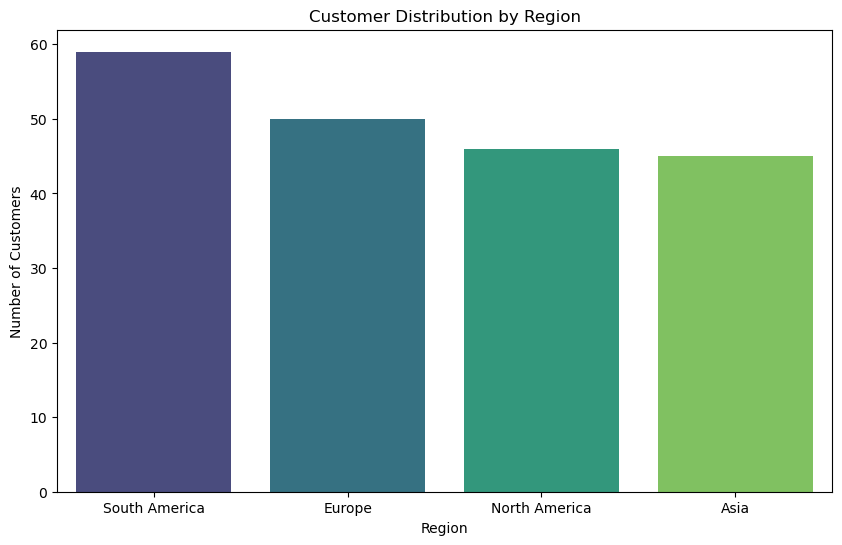

In [30]:
region_counts = customer_df['Region'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")
plt.title("Customer Distribution by Region")
plt.ylabel("Number of Customers")
plt.xlabel("Region")
plt.show()

In [31]:
merged = transactions_df.merge(customer_df, on="CustomerID").merge(products_df, on="ProductID")

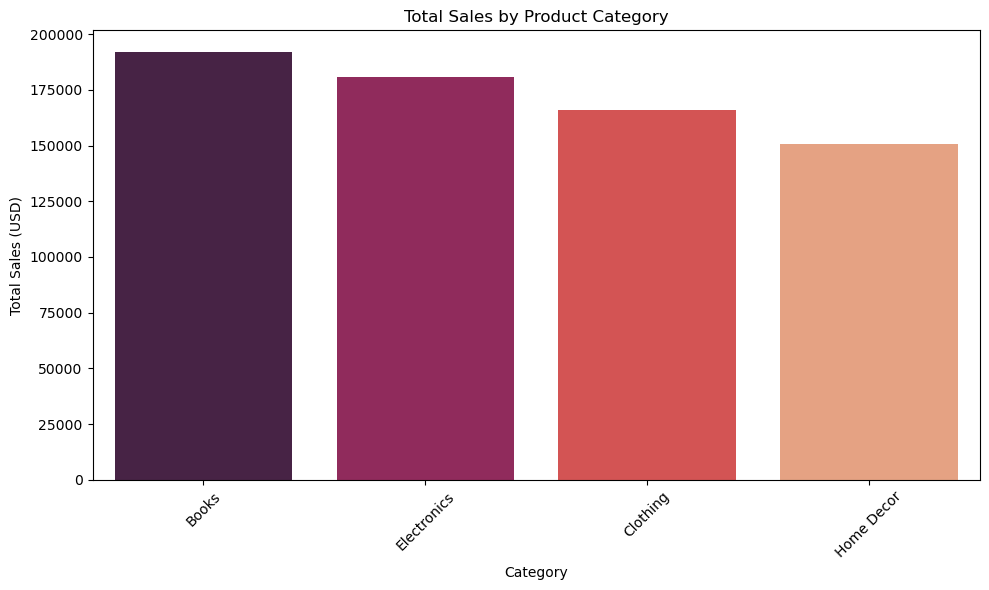

In [32]:
category_sales = merged.groupby("Category")['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.index, y=category_sales.values, palette="rocket")
plt.title("Total Sales by Product Category")
plt.ylabel("Total Sales (USD)")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

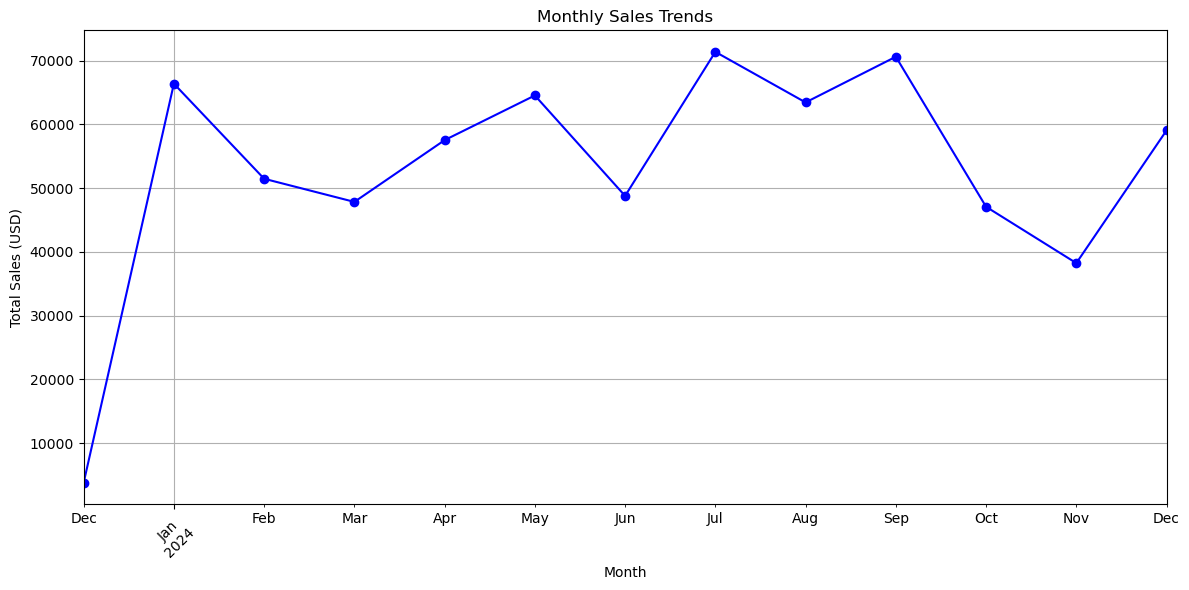

In [33]:
# Monthly sales trends
merged['TransactionDate'] = pd.to_datetime(merged['TransactionDate'])
merged['Month'] = merged['TransactionDate'].dt.to_period('M')
monthly_sales = merged.groupby("Month")['TotalValue'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind="line", marker="o", color="blue")
plt.title("Monthly Sales Trends")
plt.ylabel("Total Sales (USD)")
plt.xlabel("Month")
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()